### Part 1
#### Classification: 

#### Gini Index

In [ ]:

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

try:
    df = pd.read_csv("Processed_dataset.csv")
except FileNotFoundError:
    print("The file was not found.")

#df = df.drop(columns=['Hour'])

# Separate features and target
X = df.drop(columns=df.columns[11])  
y = df.iloc[:, 11]                   

print(X.head())
print(y.head())



   Year  Month  Day  Weekend?      Hour  Collision Type  Injury Type  \
0  2015      1    5         0  0.000000               1            2   
1  2015      1    6         0  0.652174               1            2   
2  2015      1    6         1  1.000000               1            3   
3  2015      1    7         1  0.391304               1            3   
4  2015      1    7         1  0.478261               1            2   

   Primary Factor  Reported_Location  Latitude  Longitude  Hour_Bin  
0              27               1301  0.949805   0.013861         3  
1              11               1612  0.949860   0.013810         0  
2               5               4438  0.949577   0.013616         1  
3              10              10505  0.949962   0.013576         2  
4              10              18788  0.949942   0.013555         2  
space
0    Moderate Risk
1    Moderate Risk
2         Low Risk
3        High Risk
4    Moderate Risk
Name: Risk Level, dtype: object


### Gini
gini 70 - 30 split

In [13]:
#splitting 30-70

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Gini
clf = DecisionTreeClassifier(random_state=1 , max_depth=3)
#train
clf = clf.fit(X_train ,  y_train )
#predict
y_pred = clf.predict(X_test)

print("Gini Index Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Gini Index Results:
Accuracy: 0.8942717666687264
Classification Report:
                precision    recall  f1-score   support

    High Risk       0.82      1.00      0.90      6969
     Low Risk       1.00      0.79      0.88      1966
Moderate Risk       0.98      0.83      0.89      7248

     accuracy                           0.89     16183
    macro avg       0.93      0.87      0.89     16183
 weighted avg       0.91      0.89      0.89     16183

Confusion Matrix:
 [[6935    0   34]
 [ 299 1554  113]
 [1265    0 5983]]


Confusion matrix for gini 70 - 30

Training set size: 37760
Testing set size: 16183
Original dataset size: 53943
Confusion Matrix:
 [[6935    0   34]
 [ 299 1554  113]
 [1265    0 5983]]


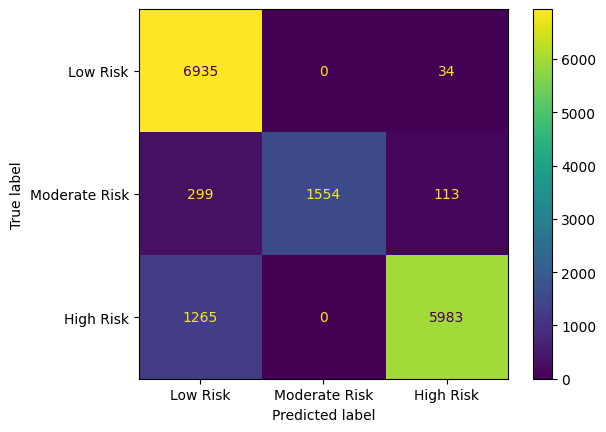

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cn = ["Low Risk", "Moderate Risk", "High Risk"]

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn )


Desicion tree for gini 70 - 30 

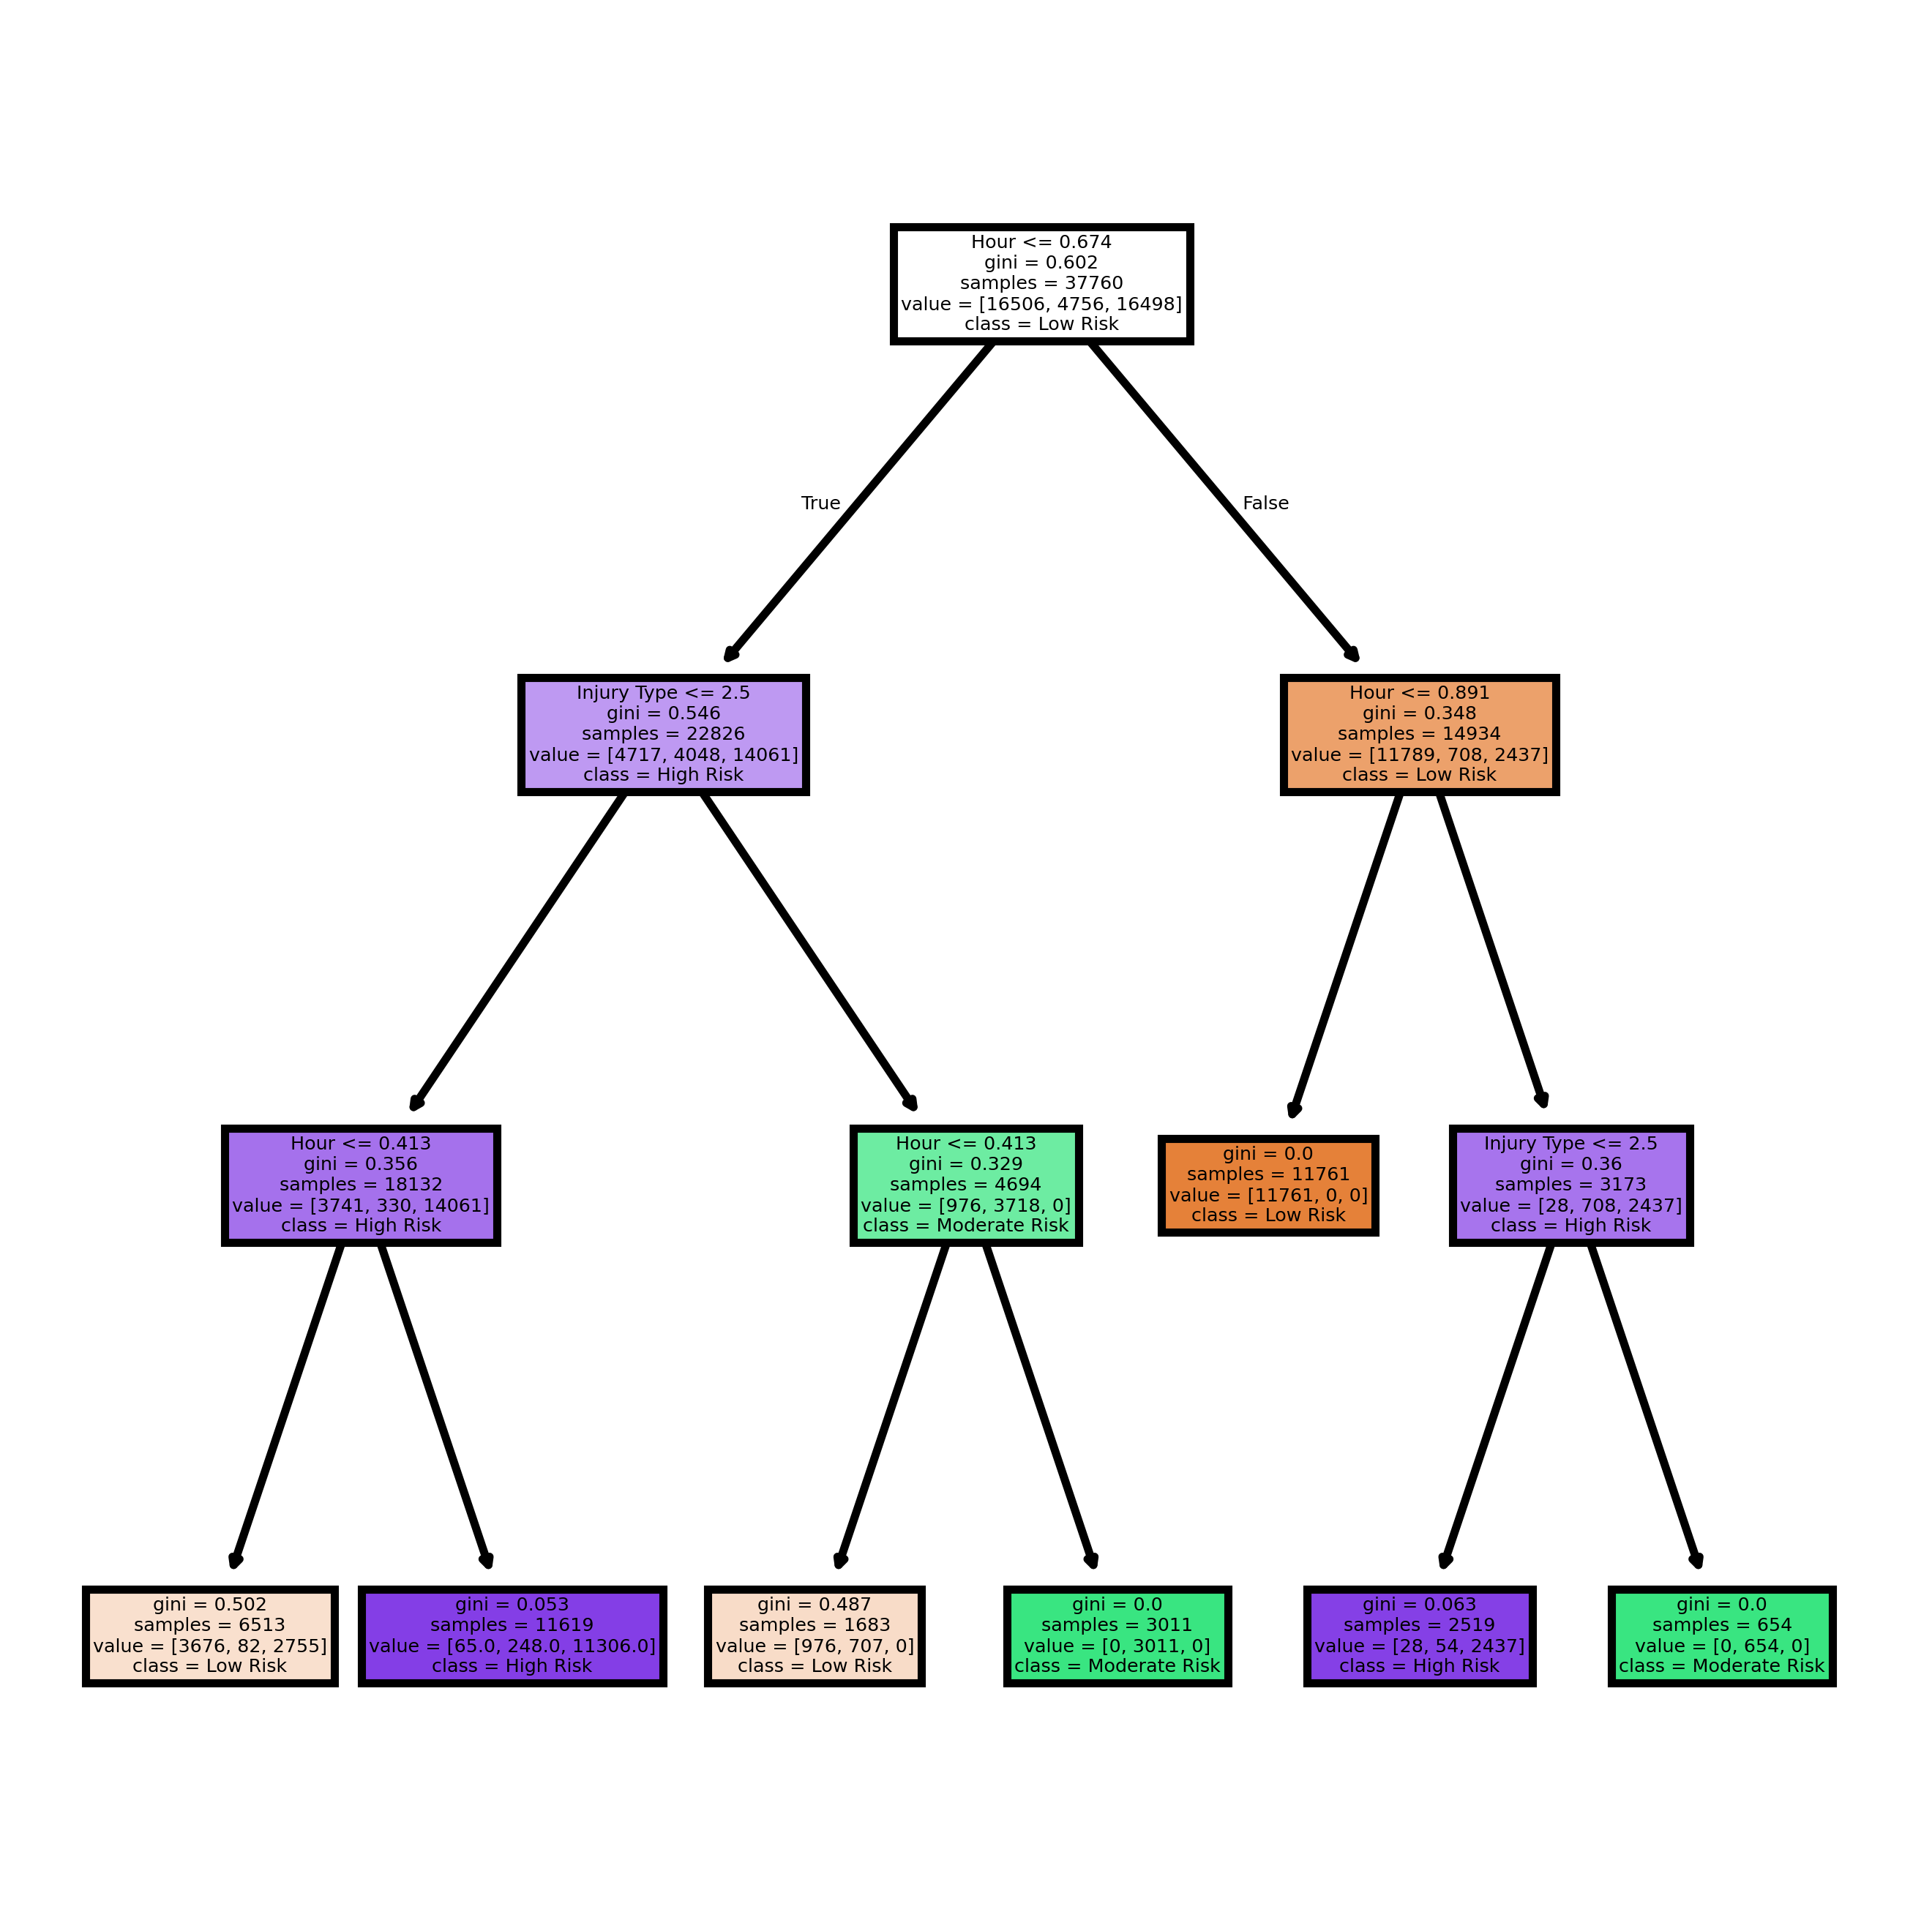

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level

cn = ["Low Risk", "Moderate Risk", "High Risk"]

fig, axes = plt.subplots(nrows = 1, figsize=(4, 4), dpi=800)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
plt.show()
#fig.savefig("")



Save and Predict using 70 - 30

In [17]:
import pickle
filename_70 = 'decision_tree_model_70_30.sav'
pickle.dump(clf, open(filename_70, 'wb'))


loaded_model_70 = pickle.load(open(filename_70, 'rb'))
predictions_70 = loaded_model_70.predict(X_test)
print("Predictions for 70-30 split test data:\n", predictions_70)

Predictions for 70-30 split test data:
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'High Risk'
 'High Risk']


Gini 80 - 20 split

In [18]:
# Splitting the dataset 80-20
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Gini Index
clf = DecisionTreeClassifier(random_state=1 , max_depth=3)  # Gini is the default criterion
# Train the classifier
clf = clf.fit(X_train, y_train)
# Predict on the 20% test set
y_pred = clf.predict(X_test)

# Display results
print("Gini Index Results (80-20 split):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Gini Index Results (80-20 split):
Accuracy: 0.8942441375475021
Classification Report:
                precision    recall  f1-score   support

    High Risk       0.82      1.00      0.90      4681
     Low Risk       1.00      0.80      0.89      1321
Moderate Risk       0.98      0.82      0.89      4787

     accuracy                           0.89     10789
    macro avg       0.93      0.87      0.89     10789
 weighted avg       0.91      0.89      0.89     10789

Confusion Matrix:
 [[4664    0   17]
 [ 190 1053   78]
 [ 856    0 3931]]


Confusion matrix for gini 80 - 20

Training set size: 43154
Testing set size: 10789
Original dataset size: 53943
Confusion Matrix:
 [[4664    0   17]
 [ 190 1053   78]
 [ 856    0 3931]]


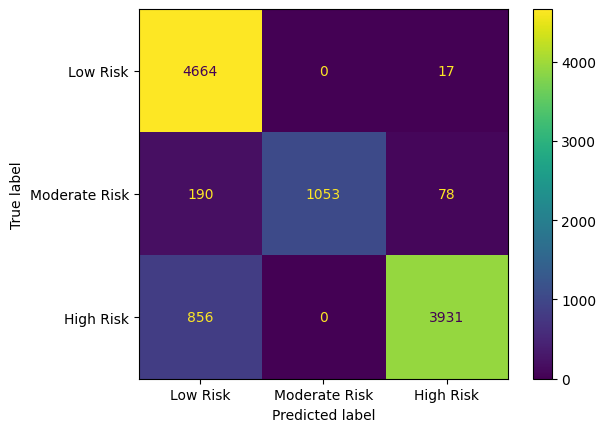

In [19]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn )

Desicion tree for gini 80- 20

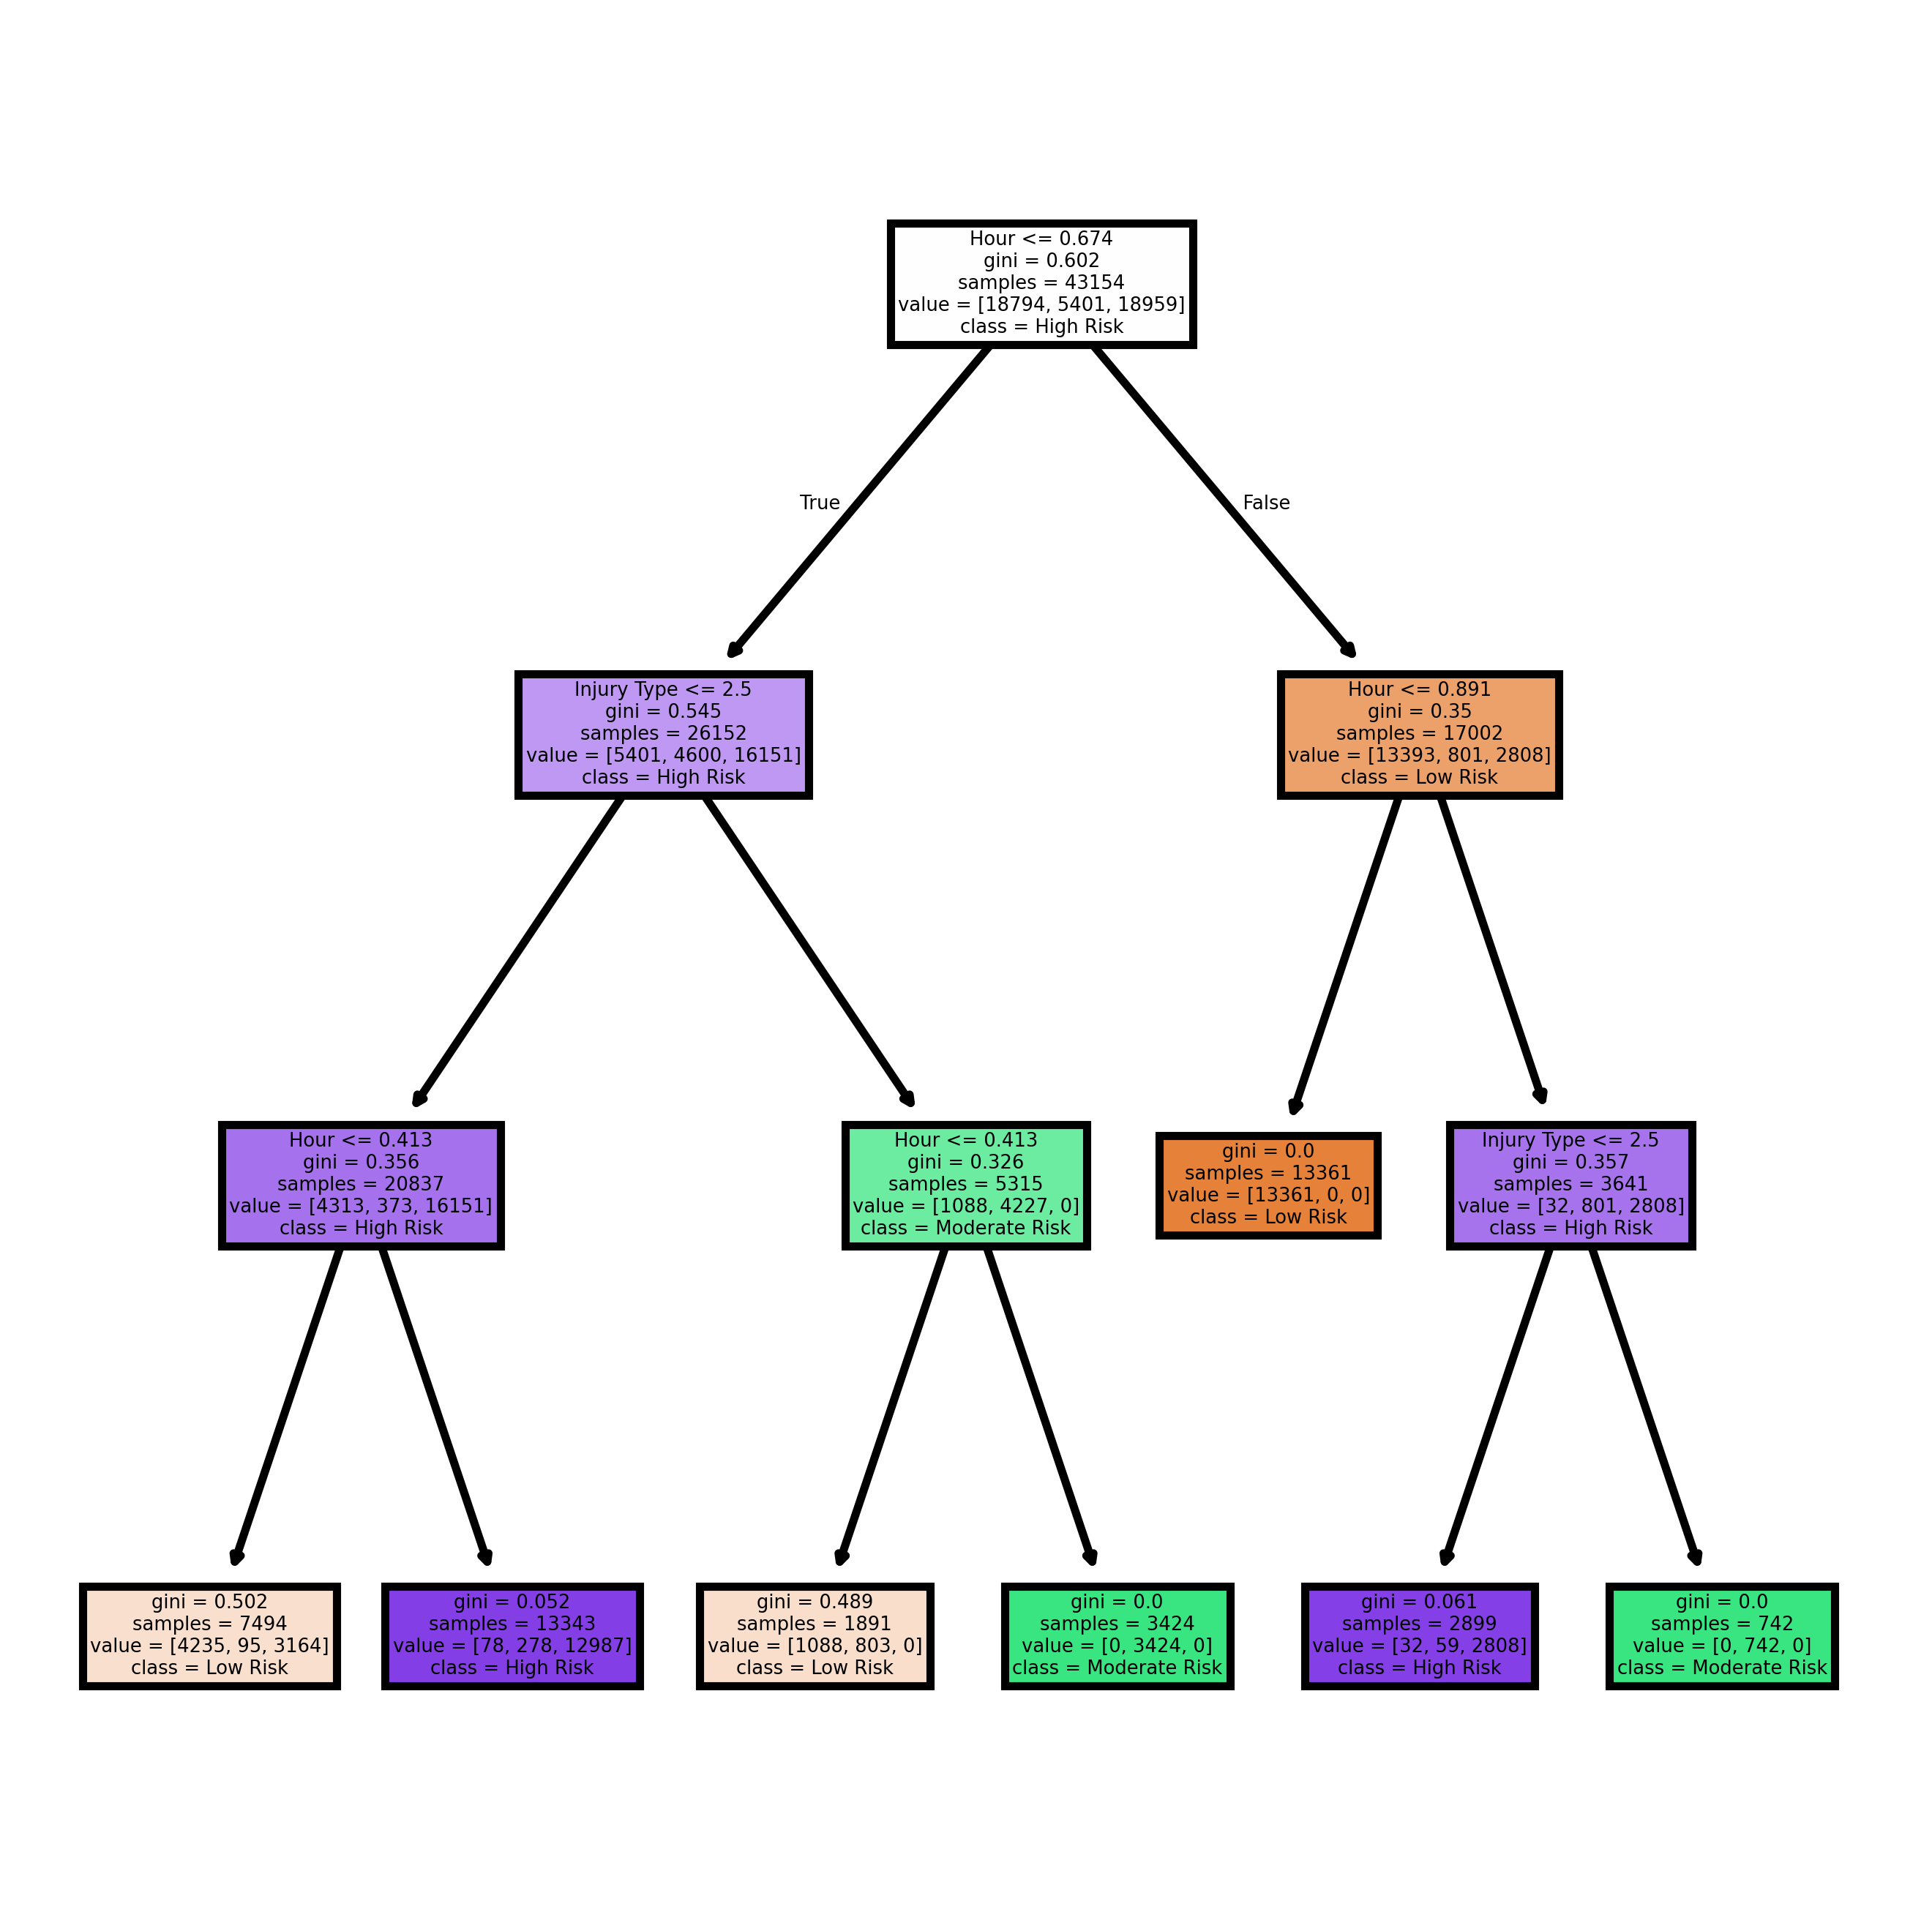

In [20]:
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level

cn = ["Low Risk", "Moderate Risk", "High Risk"]

fig, axes = plt.subplots(nrows = 1, figsize=(4, 4), dpi=800)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
plt.show()
#fig.savefig("")


Save and Predict using 80 - 20

In [21]:
filename_80 = 'decision_tree_model_80_20.sav'
pickle.dump(clf, open(filename_80, 'wb'))

loaded_model_80 = pickle.load(open(filename_80, 'rb'))
predictions_80 = loaded_model_80.predict(X_test)
print("Predictions for 80-20 split test data:\n", predictions_80)

Predictions for 80-20 split test data:
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'Moderate Risk'
 'Low Risk']


Gini 90 - 10 split

In [22]:
# Splitting data into 90% train and 10% test
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

# Initialize the Decision Tree classifier with Gini index
clf = DecisionTreeClassifier(random_state=1 , max_depth=3)
# Train the model
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)

# Display results
print("Gini Index Results (90-10 split):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Gini Index Results (90-10 split):
Accuracy: 0.8930491195551437
Classification Report:
                precision    recall  f1-score   support

    High Risk       0.81      1.00      0.90      2314
     Low Risk       1.00      0.78      0.87       682
Moderate Risk       0.97      0.83      0.89      2399

     accuracy                           0.89      5395
    macro avg       0.93      0.87      0.89      5395
 weighted avg       0.91      0.89      0.89      5395



Confusion matrix for 90 - 10

Training set size: 48548
Testing set size: 5395
Original dataset size: 53943
Confusion Matrix:
 [[2307    0    7]
 [ 108  530   44]
 [ 418    0 1981]]


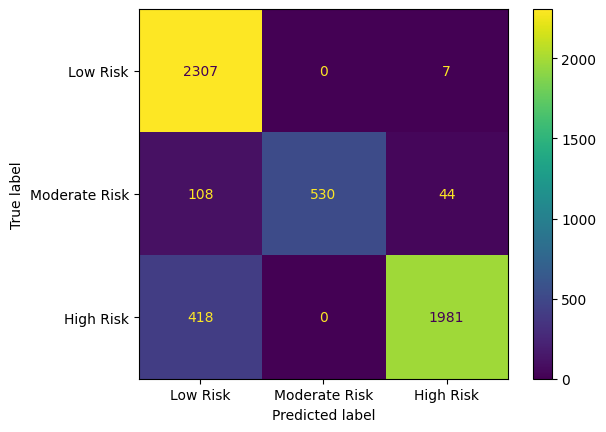

In [23]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn )

Desicion tree for 90 - 10

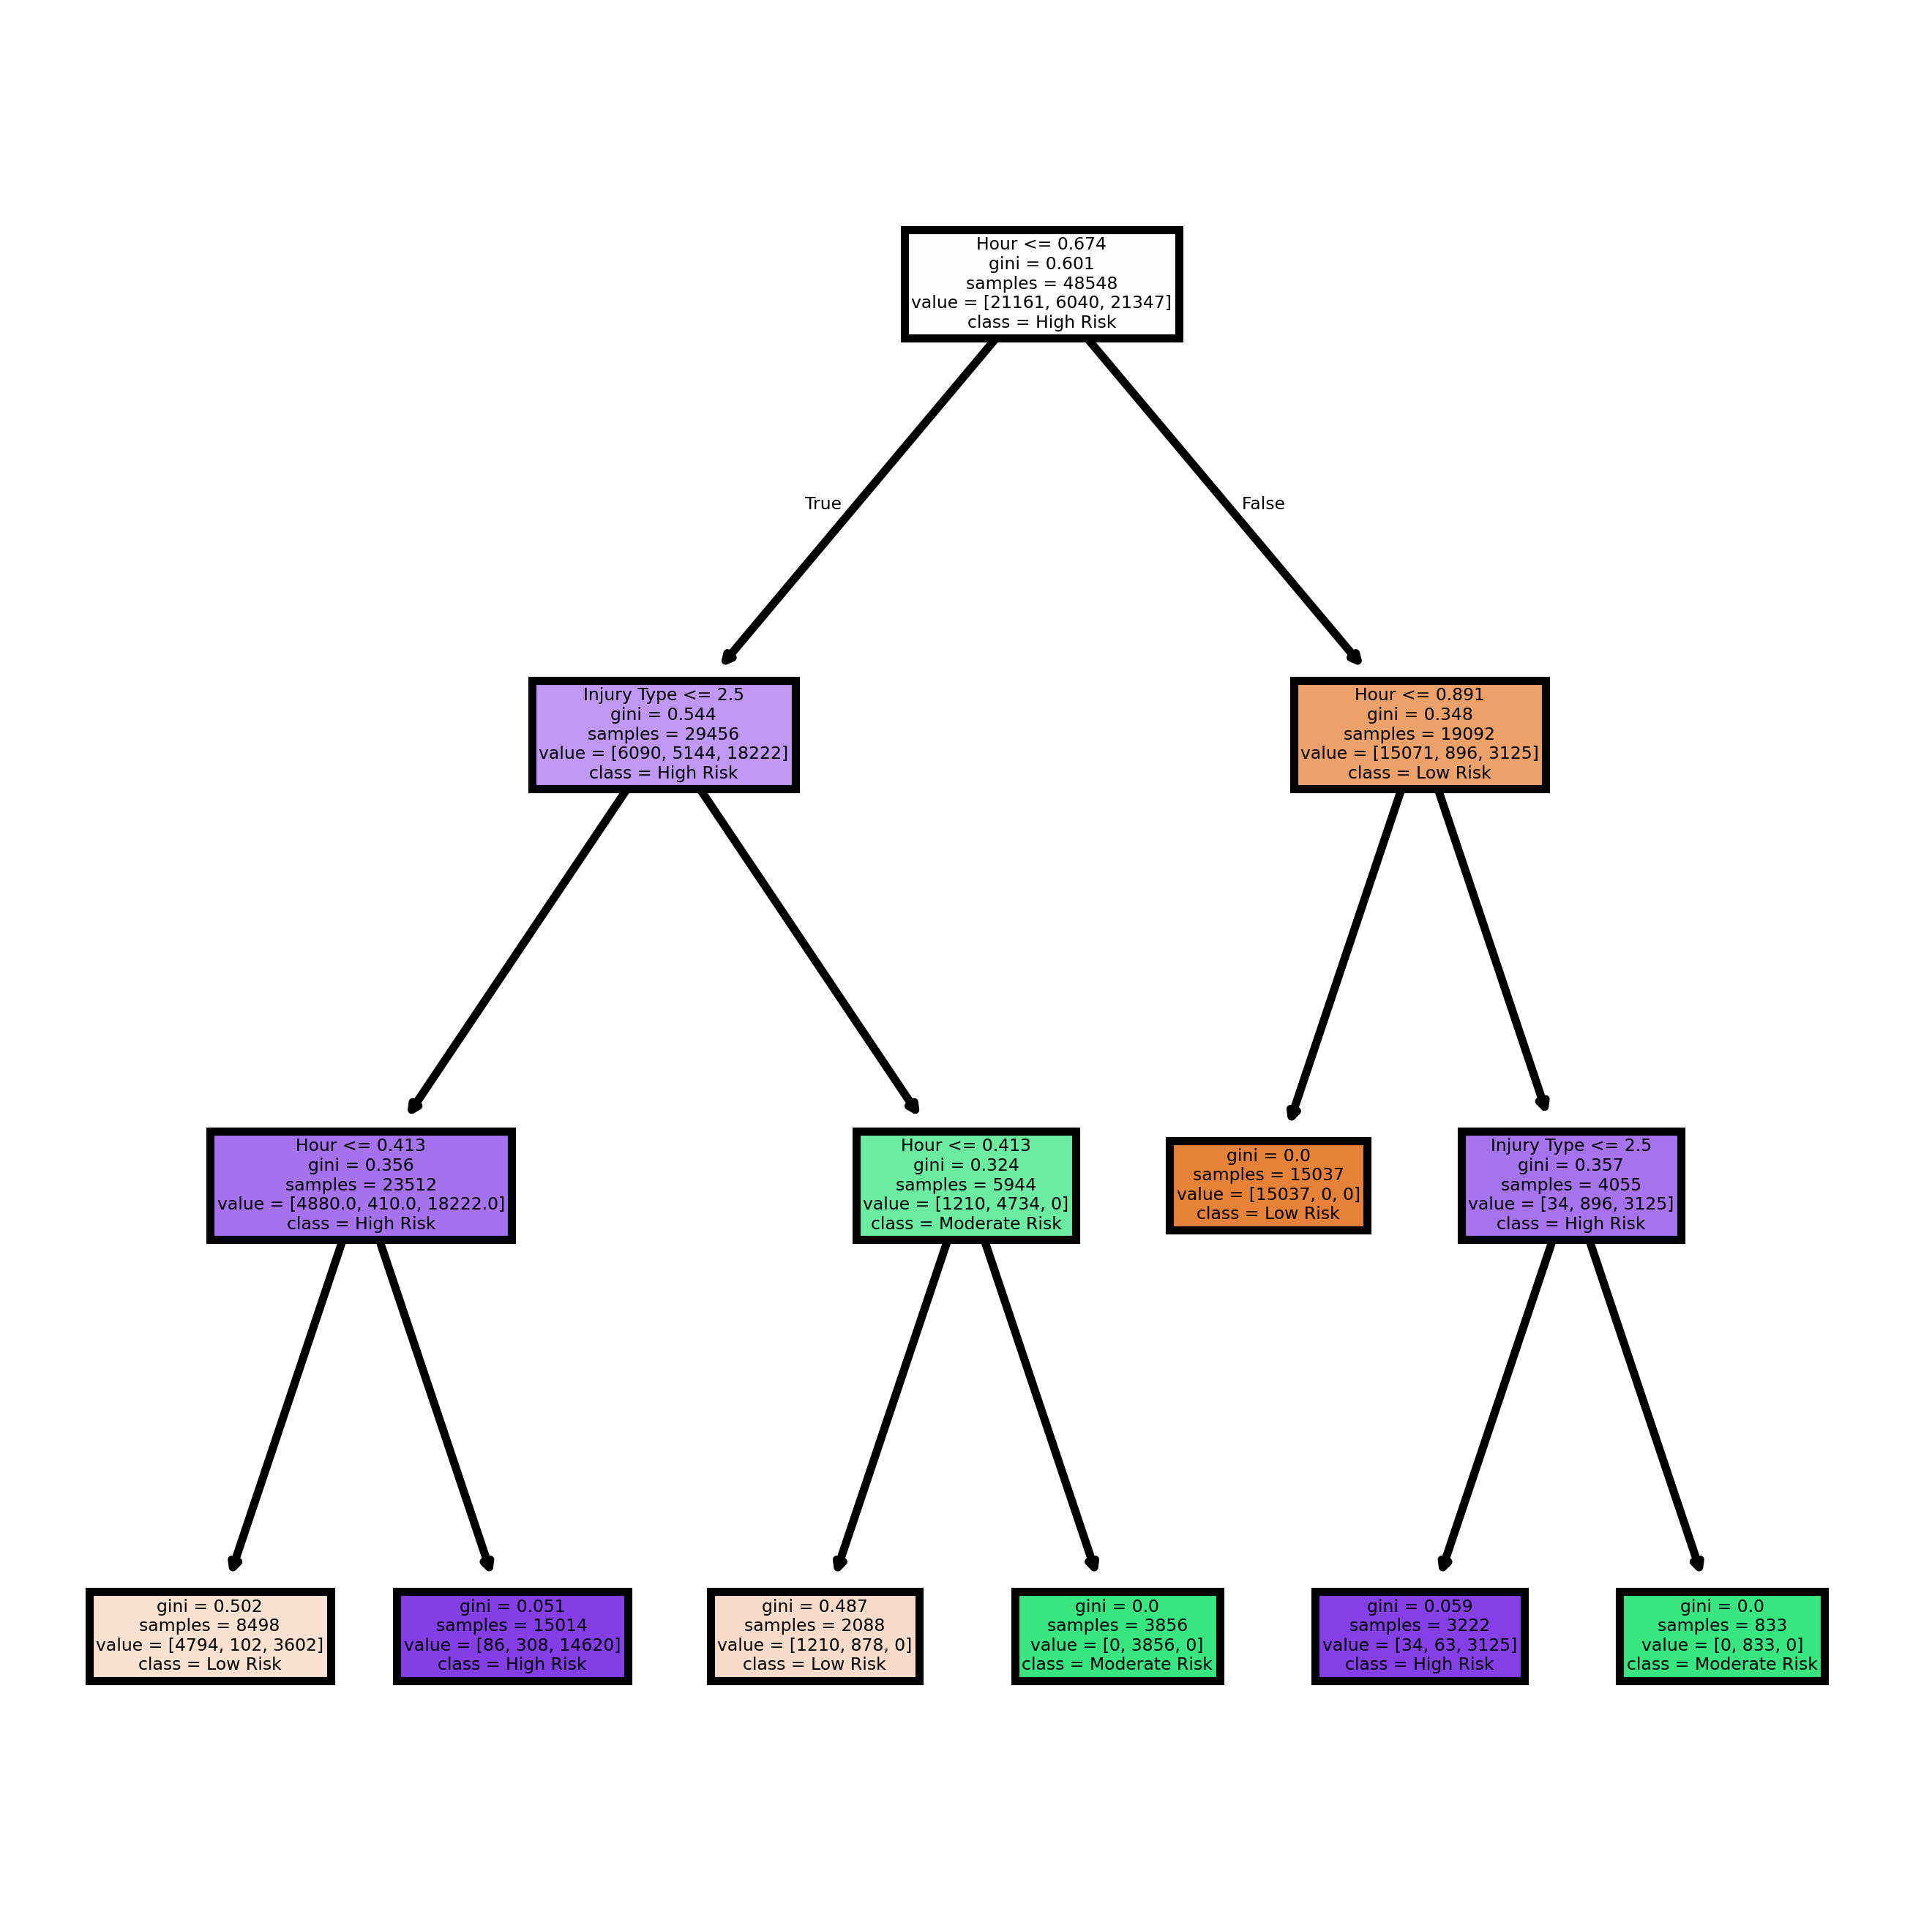

In [24]:
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level

cn = ["Low Risk", "Moderate Risk", "High Risk"]

fig, axes = plt.subplots(nrows = 1, figsize=(4, 4), dpi=800)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
plt.show()
#fig.savefig("")

Save and Predict using 90 - 10

In [25]:
filename_90 = 'decision_tree_model_90_10.sav'
pickle.dump(clf, open(filename_90, 'wb'))

loaded_model_90 = pickle.load(open(filename_90, 'rb'))
predictions_90 = loaded_model_90.predict(X_test)
print("Predictions for 90-10 split test data:\n", predictions_90)

Predictions for 90-10 split test data:
 ['High Risk' 'High Risk' 'High Risk' ... 'Moderate Risk' 'Low Risk'
 'Moderate Risk']


### Entropy:

#### 10/90 split

Accuracy: 0.8948279058271025
[[21051     0   116]
 [  984  4672   372]
 [ 3634     0 17720]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'Moderate Risk'
 'Moderate Risk']


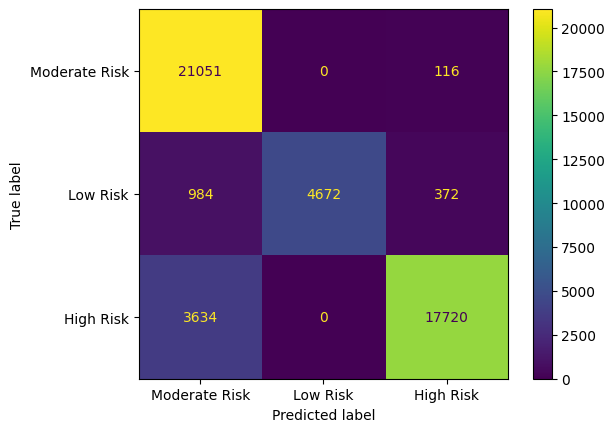

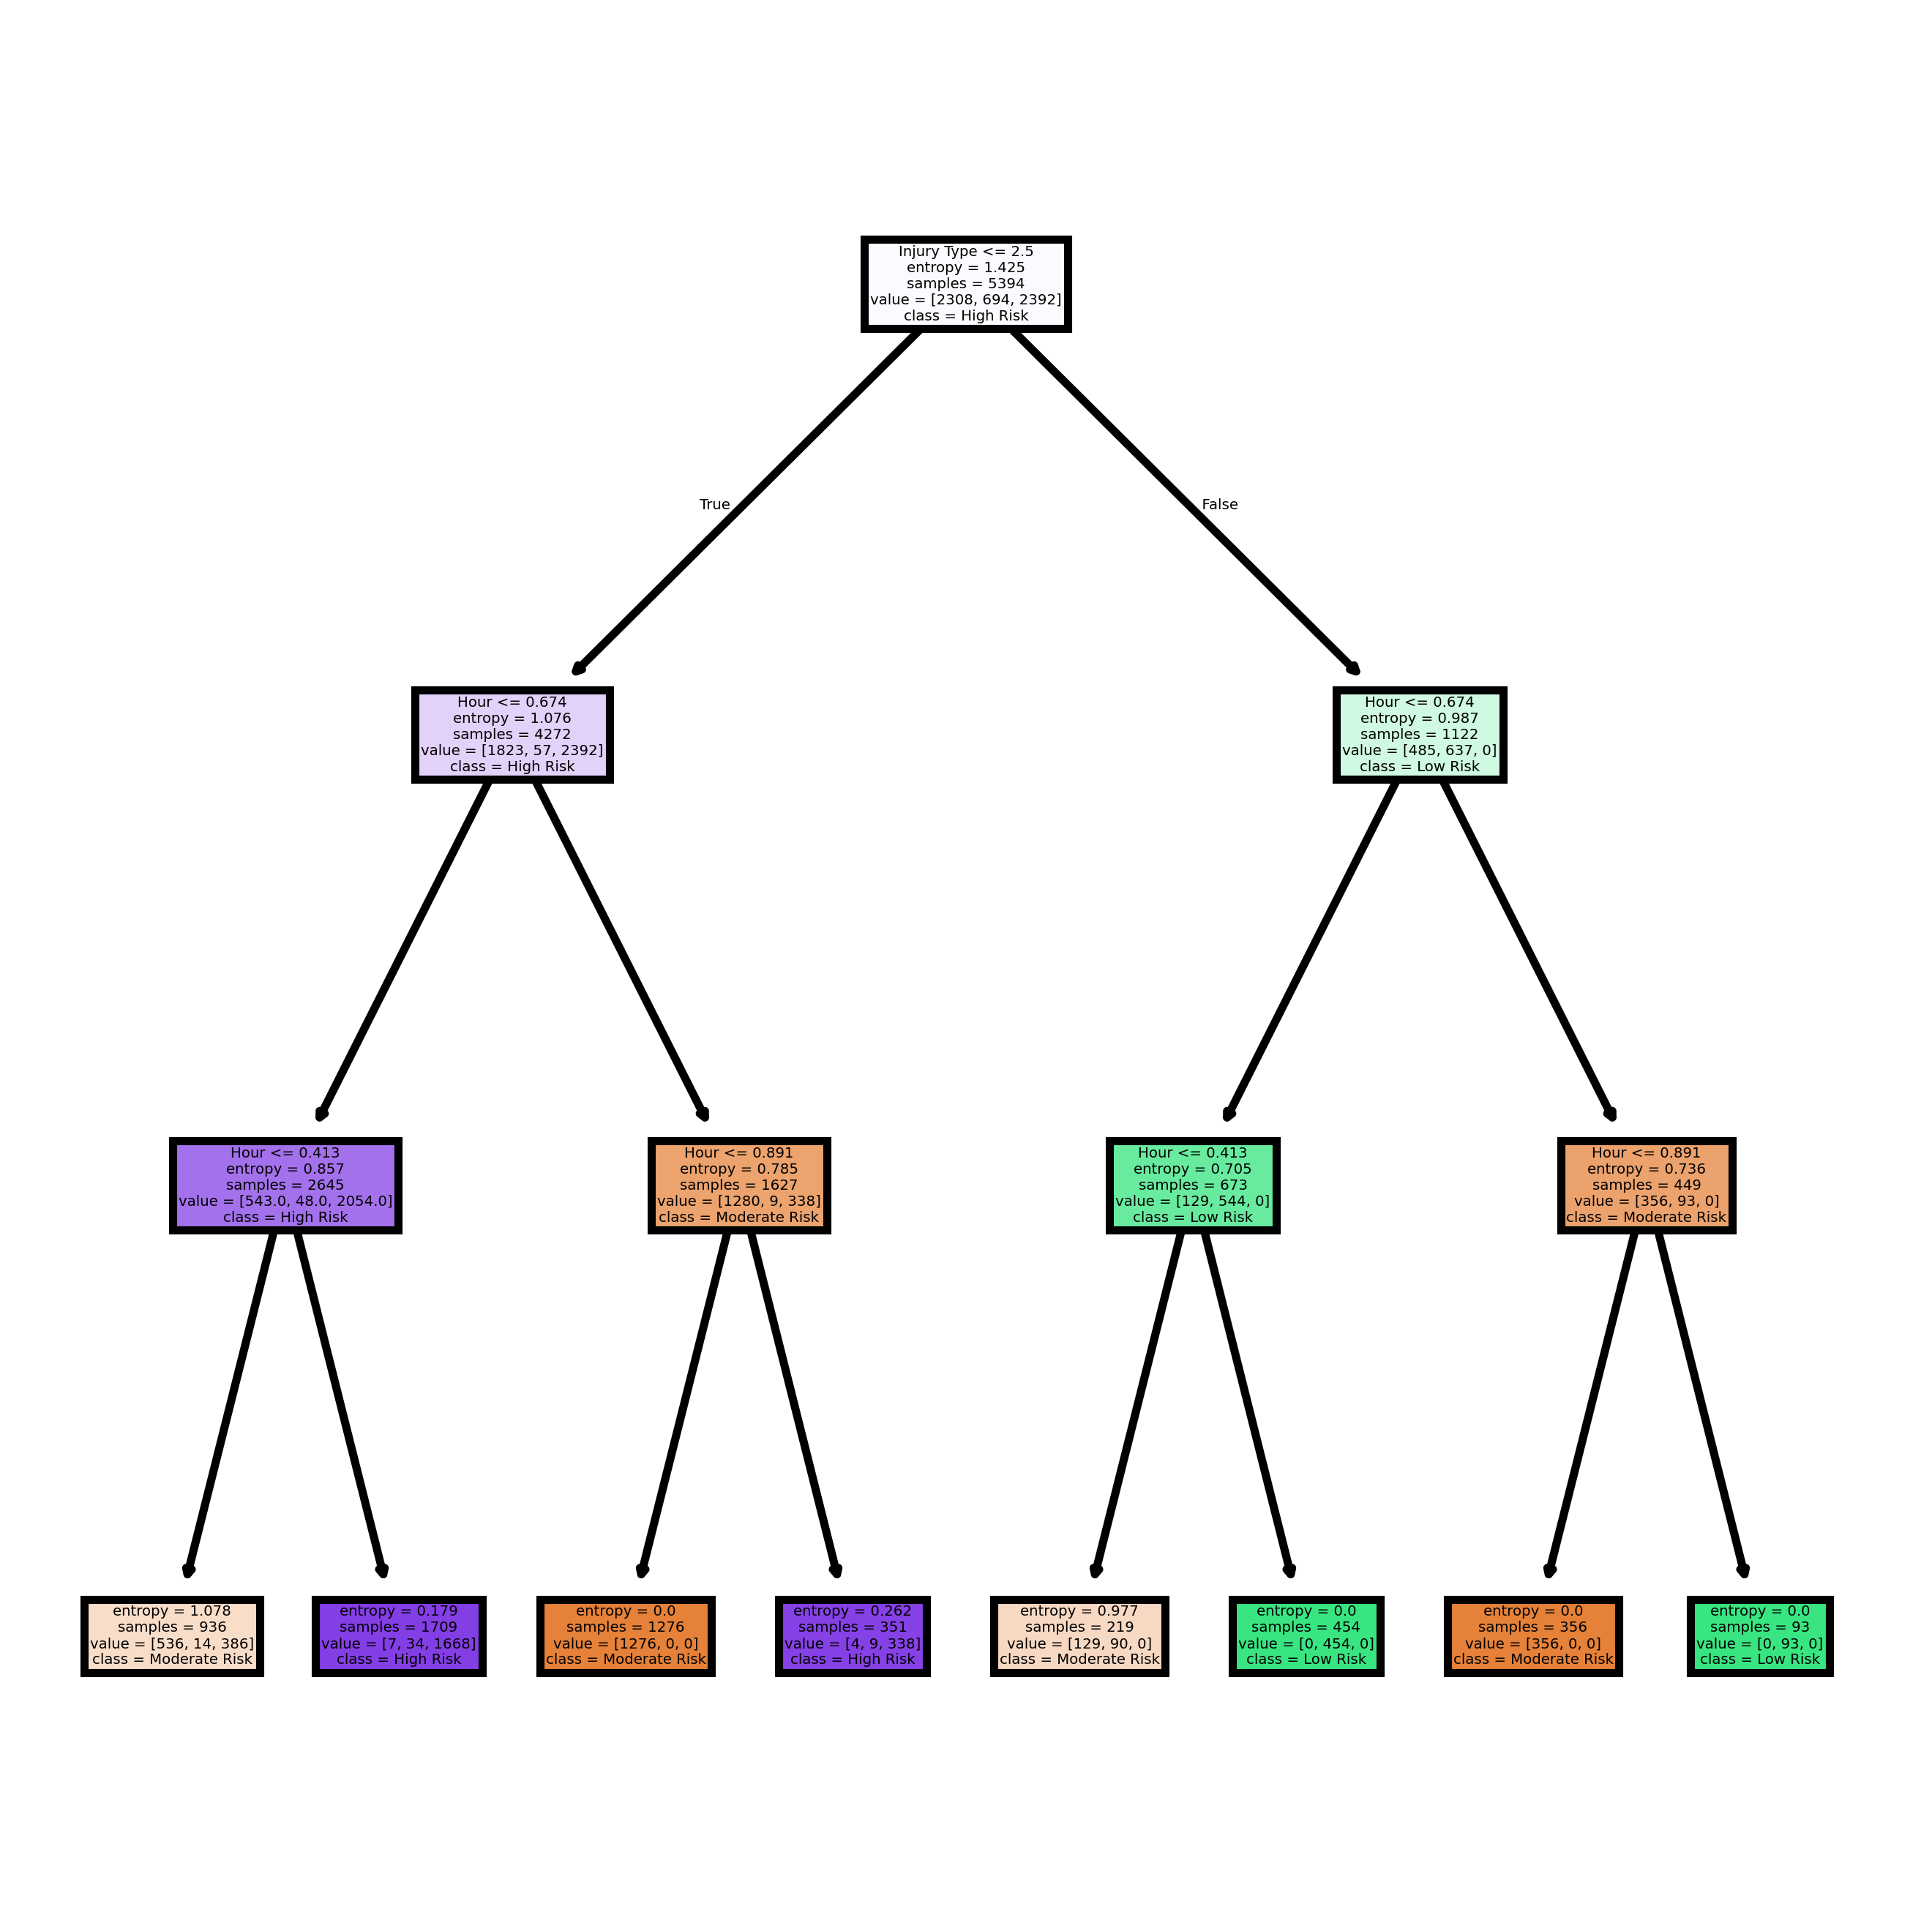

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree


#load data
df = pd.read_csv("Dataset/Processed_dataset.csv")

#split dataset in features and target variable
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level
X = df[fn] # feature names
y = df['Risk Level'] # Target variable

#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.9,random_state=1) # %90 test %10 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)


#### 80/20 split

Accuracy: 0.894681960375391
[[18753     0   106]
 [  870  4159   331]
 [ 3238     0 15698]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'High Risk' 'Low Risk' 'Low Risk']


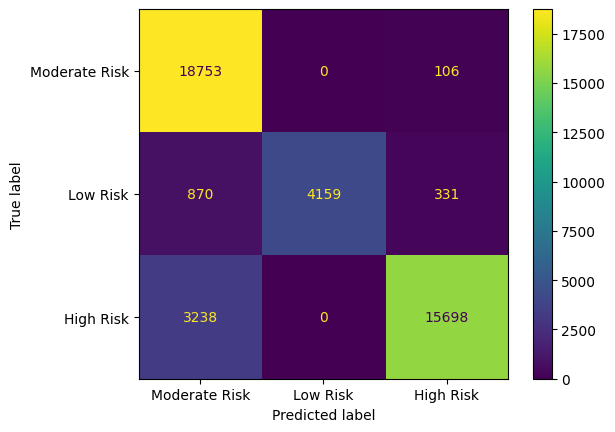

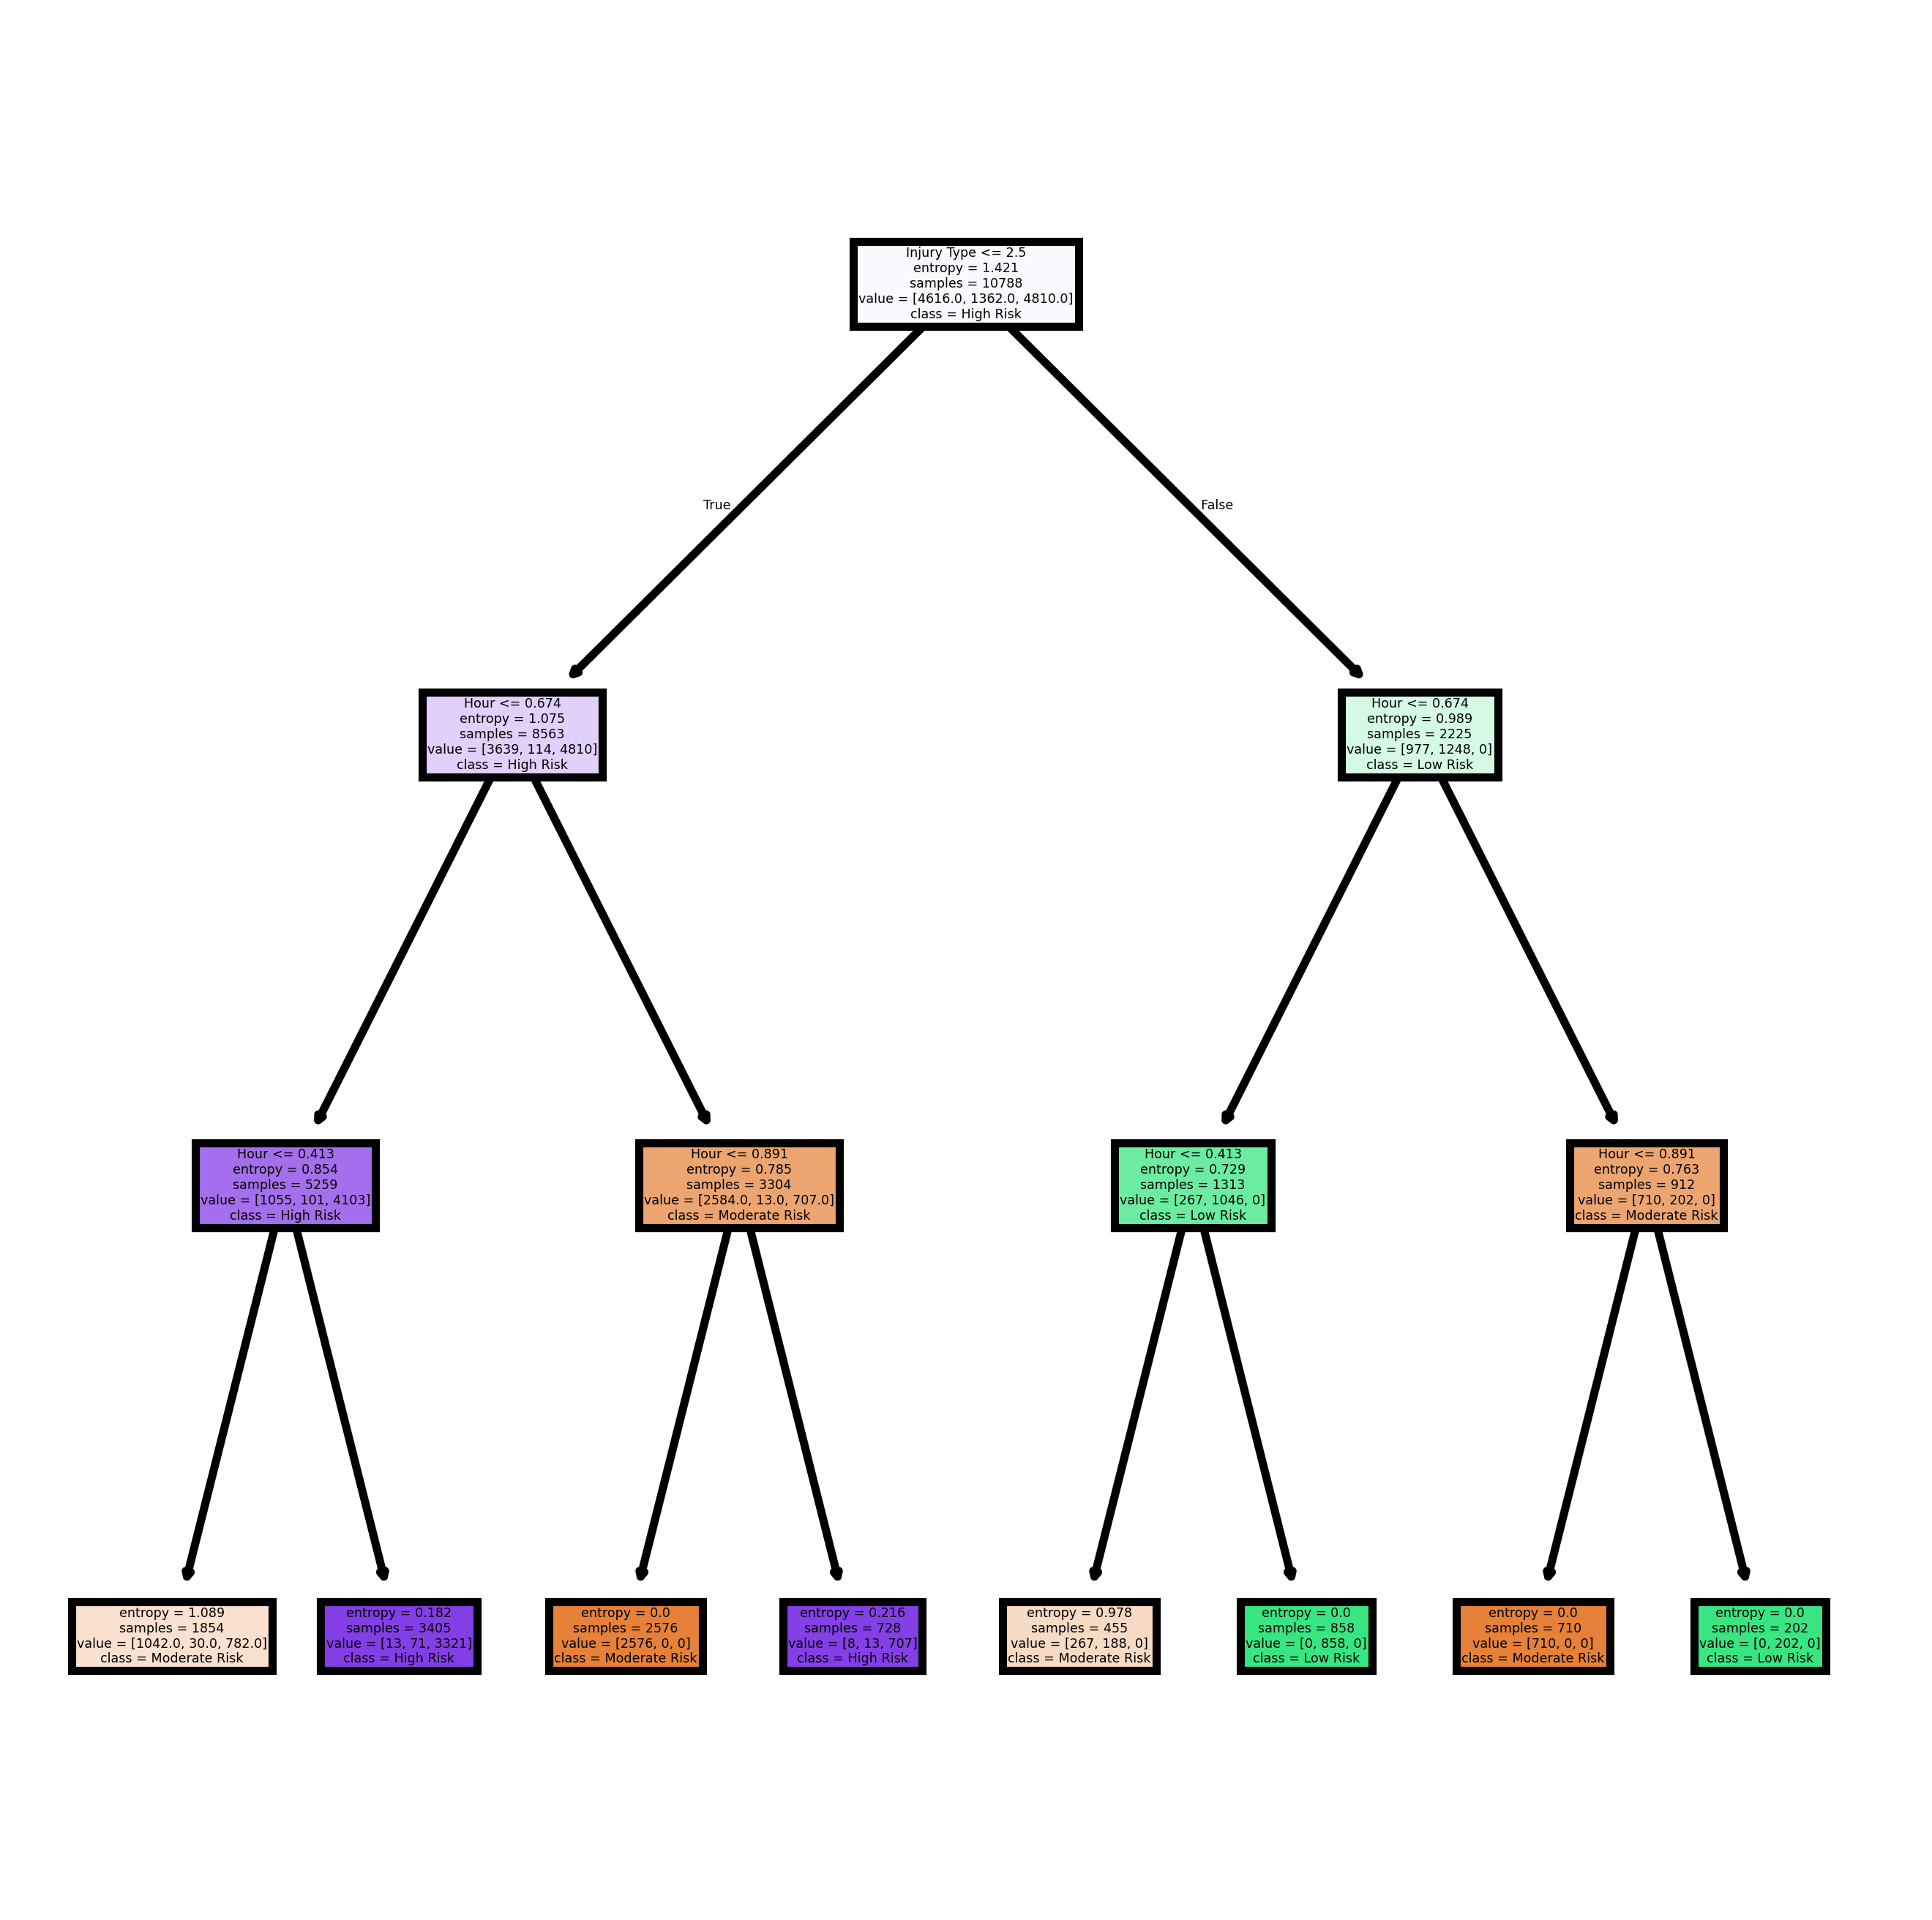

In [ ]:
#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.8,random_state=1) # %80 test %20 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)

#### 70/30 split

Accuracy: 0.8944943195360292
[[16358     0    96]
 [  743  3616   292]
 [ 2853     0 13803]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'High Risk' 'Moderate Risk'
 'Moderate Risk']


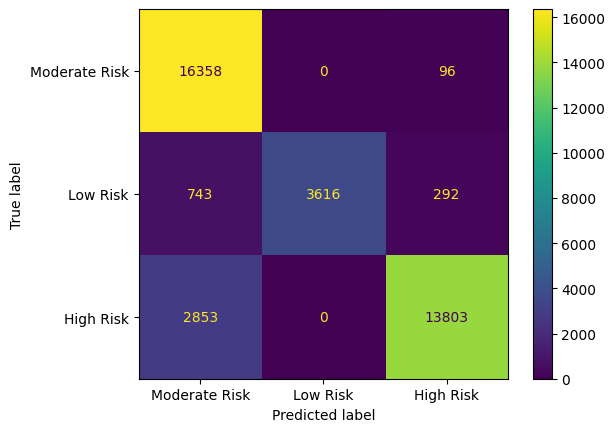

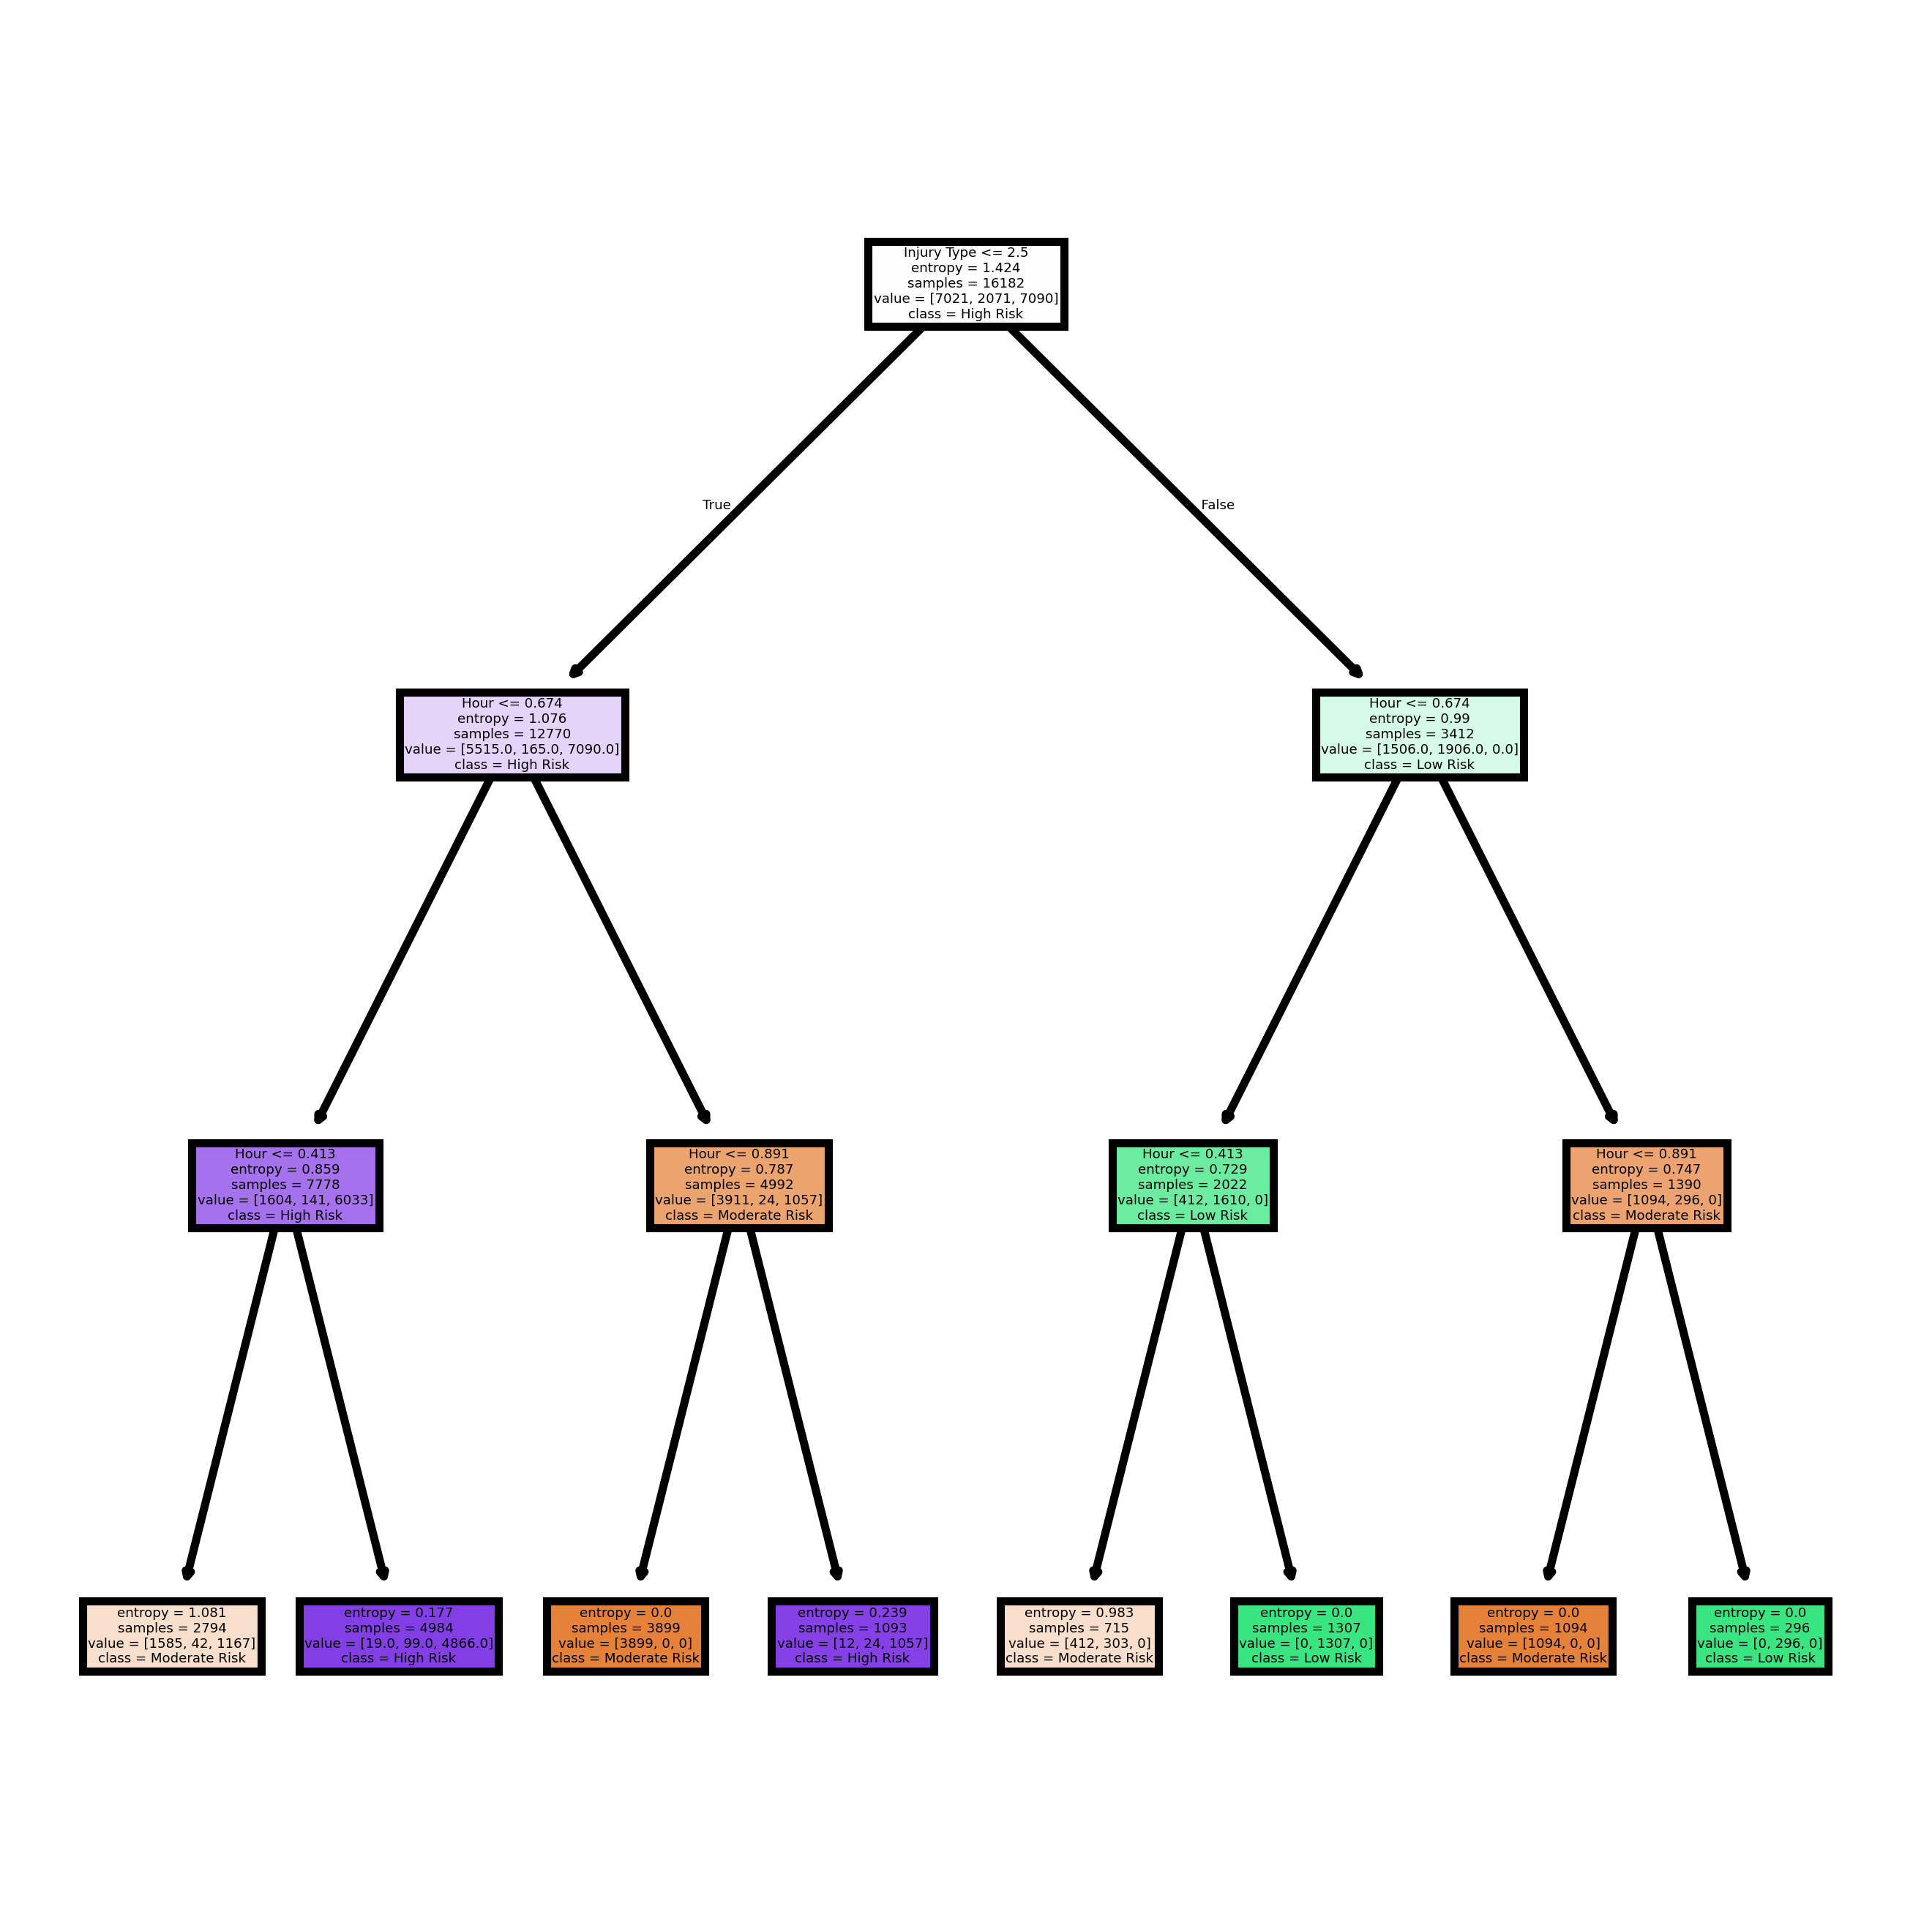

In [ ]:
#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.7,random_state=1) # %70 test %30 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)

### Part 2
#### Clustering:

//

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv("Dataset/Processed_dataset.csv", encoding="windows-1252")  
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53943 non-null  int64  
 4   Hour               53943 non-null  float64
 5   Collision Type     53943 non-null  int64  
 6   Injury Type        53943 non-null  int64  
 7   Primary Factor     53943 non-null  int64  
 8   Reported_Location  53943 non-null  int64  
 9   Latitude           53943 non-null  float64
 10  Longitude          53943 non-null  float64
 11  Risk Level         53943 non-null  object 
 12  Hour_Bin           53943 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 5.4+ MB
None


### Step 1: Feature Scaling
To prepare for clustering, we removed the target variable, 'Risk Level,' and standardized the remaining features. Standard scaling was applied to ensure that each feature contributes equally to the clustering algorithm.

Below is the head of the scaled dataset:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Remove class label for clustering
features = data.drop(columns=['Risk Level'])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows to confirm scaling
print("\nScaled DataFrame:")
print(scaled_data.head())


Scaled DataFrame:
       Year     Month       Day  Weekend?      Hour  Collision Type  \
0  1.591657 -1.611041  0.420592 -0.571221 -2.539427       -0.058135   
1  1.591657 -1.611041  0.944311 -0.571221  0.287886       -0.058135   
2  1.591657 -1.611041  0.944311  1.750636  1.795786       -0.058135   
3  1.591657 -1.611041  1.468030  1.750636 -0.843039       -0.058135   
4  1.591657 -1.611041  1.468030  1.750636 -0.466064       -0.058135   

   Injury Type  Primary Factor  Reported_Location  Latitude  Longitude  \
0    -0.404883        0.330961          -1.339926  0.316932  -0.316895   
1    -0.404883       -0.698938          -1.287891  0.317130  -0.317254   
2     1.819890       -1.085150          -0.815059  0.316097  -0.318619   
3     1.819890       -0.763306           0.200040  0.317503  -0.318902   
4    -0.404883       -0.763306           1.585908  0.317432  -0.319049   

   Hour_Bin  
0  2.045609  
1 -0.933502  
2  0.059535  
3  1.052572  
4  1.052572  


### Exploring Different Sizes for \( K \) in K-Means Clustering
To identify the optimal number of clusters, we apply the K-Means clustering algorithm with at least three different values for \( K \) ( \( K = 3, 4, 5 \)). Starting with when the k=4

In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(21)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=21)
kmeans_result = kmeans.fit_predict(scaled_data)


print("Cluster Centers: ")
print(kmeans.cluster_centers_)  

print("\nCluster Labels: ")
print(kmeans.labels_) 


Cluster Centers: 
[[-2.13872095e-01  5.21067119e-02 -1.40346180e-02 -1.58436215e-03
  -2.18179517e-02 -1.24317086e-01 -1.23403093e-01  4.97332233e-02
   3.85128401e-02 -3.15146909e+00  3.15190938e+00  3.59772826e-02]
 [ 8.21914691e-03  2.32417821e-03 -2.74704555e-01 -3.82955385e-01
   4.99366423e-01  8.26172674e-02  2.95046868e-02 -5.08295798e-02
  -3.37589758e-02  3.17198297e-01 -3.17207501e-01 -6.50539247e-01]
 [ 5.87922177e-02 -2.62925378e-02 -1.47656104e-01 -1.37954853e-01
  -1.22806094e+00 -1.10573971e-01 -2.07073377e-02  6.64725741e-02
   4.07034231e-02  3.17033791e-01 -3.17196123e-01  1.33528908e+00]
 [-1.29841056e-04  6.77372262e-03  1.36006376e+00  1.75063634e+00
   4.92668323e-01 -1.70871836e-02  1.13330183e-02  3.19299631e-02
   2.41940010e-02  3.17080778e-01 -3.17029383e-01 -1.28594936e-01]]

Cluster Labels: 
[2 1 3 ... 0 0 0]


KMeans when k=3

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(21)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans_result = kmeans.fit_predict(scaled_data)


print("Cluster Centers: ")
print(kmeans.cluster_centers_)  

print("\nCluster Labels: ")
print(kmeans.labels_) 


Cluster Centers: 
[[-2.13872095e-01  5.21067119e-02 -1.40346180e-02 -1.58436215e-03
  -2.18179517e-02 -1.24317086e-01 -1.23403093e-01  4.97332233e-02
   3.85128401e-02 -3.15146909e+00  3.15190938e+00  3.59772826e-02]
 [ 6.01465191e-03  3.18355148e-03  4.02993401e-03 -1.34133821e-02
   5.49736956e-01  6.88126359e-02  2.65886657e-02 -3.90580231e-02
  -2.60998009e-02  3.17197633e-01 -3.17200624e-01 -6.08387927e-01]
 [ 5.52109148e-02 -2.35508226e-02 -4.27431610e-03  2.96455438e-02
  -1.18730439e+00 -1.09803729e-01 -1.83665442e-02  6.89741156e-02
   4.44052166e-02  3.16995184e-01 -3.17129244e-01  1.31019973e+00]]

Cluster Labels: 
[2 1 1 ... 0 0 0]


KMeans when k=5

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(21)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=21)
kmeans_result = kmeans.fit_predict(scaled_data)


print("Cluster Centers: ")
print(kmeans.cluster_centers_)  

print("\nCluster Labels: ")
print(kmeans.labels_) 


Cluster Centers: 
[[-2.13872095e-01  5.21067119e-02 -1.40346180e-02 -1.58436215e-03
  -2.18179517e-02 -1.24317086e-01 -1.23403093e-01  4.97332233e-02
   3.85128401e-02 -3.15146909e+00  3.15190938e+00  3.59772826e-02]
 [-3.93785219e-01  1.36633625e-02 -2.26063540e-01 -4.18534914e-01
   4.73678265e-01  3.18388630e-01  4.11042206e-01 -4.30724386e-01
  -6.29590972e-01  3.17239152e-01 -3.17139786e-01 -6.27586898e-01]
 [ 4.26145572e-01 -6.88966538e-03 -3.24579587e-01 -3.47450018e-01
   5.03755530e-01 -1.29074806e-01 -3.45514214e-01  3.43638040e-01
   5.82073727e-01  3.17165352e-01 -3.17277815e-01 -6.41059062e-01]
 [-1.29841056e-04  6.77372262e-03  1.36006376e+00  1.75063634e+00
   4.92668323e-01 -1.70871836e-02  1.13330183e-02  3.19299631e-02
   2.41940010e-02  3.17080778e-01 -3.17029383e-01 -1.28594936e-01]
 [ 6.77650235e-02 -2.96135314e-02 -1.46820047e-01 -1.30996198e-01
  -1.23934353e+00 -1.51955367e-01 -5.05755309e-02  7.67776202e-02
   5.75376240e-02  3.17020377e-01 -3.17197327e-01  1.3

In [ ]:
%pip install yellowbrick

The average silhouette score for k=3 is: 0.18195072479886865


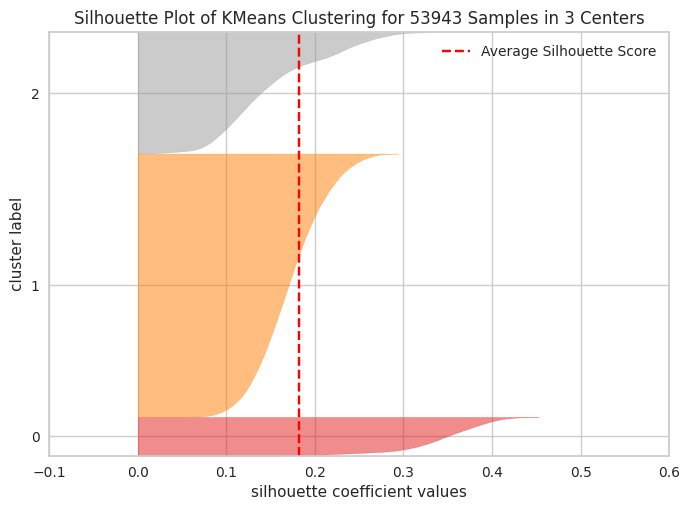

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'DejaVu Sans'  



# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

#Perform Silhouette Visualization (k=3, k=4, k=5)
k_values = [3, 4, 5]

for k in k_values:
    # Initialize the KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=21)
    
    # Create a SilhouetteVisualizer object using KMeans and the current k value
    visualizer = SilhouetteVisualizer(kmeans, color="yellowbrick")
    
    
    visualizer.fit(scaled_data)  
    
    # Print the average silhouette score for the current k value
    print(f"The average silhouette score for k={k} is:", visualizer.silhouette_score_)
    
    # Show the silhouette plot for the current k value
    visualizer.show()


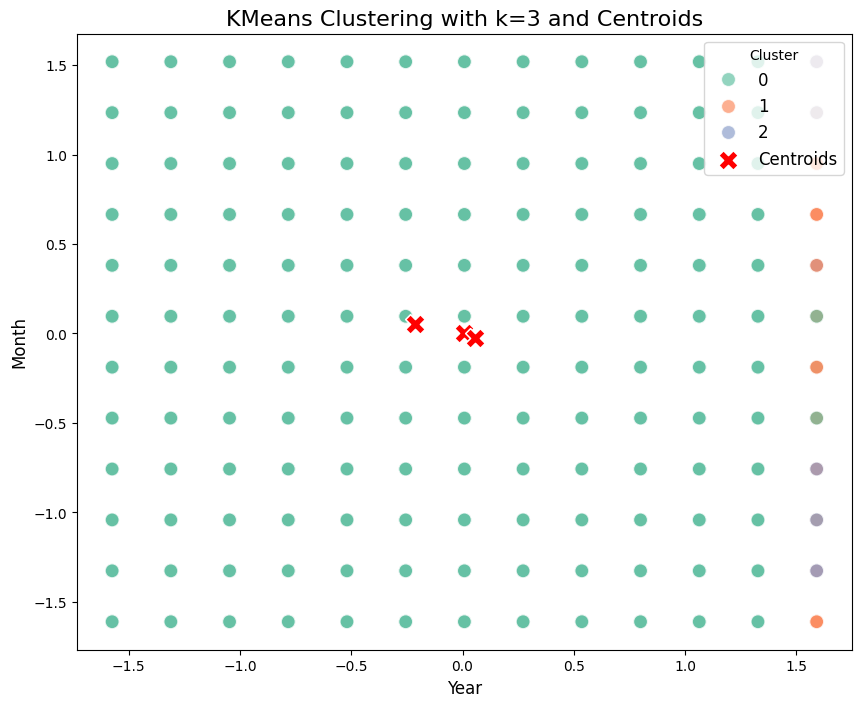

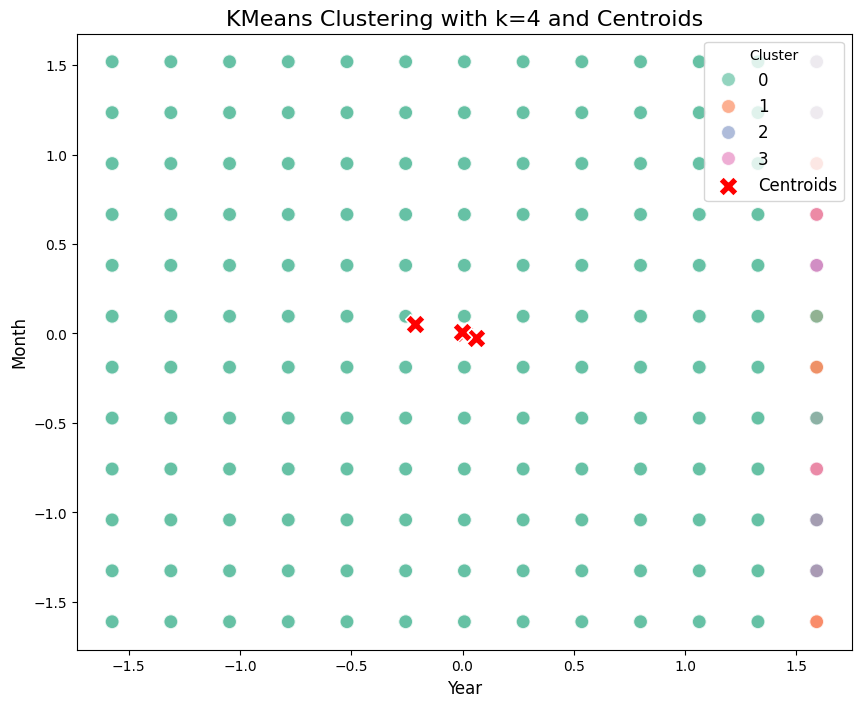

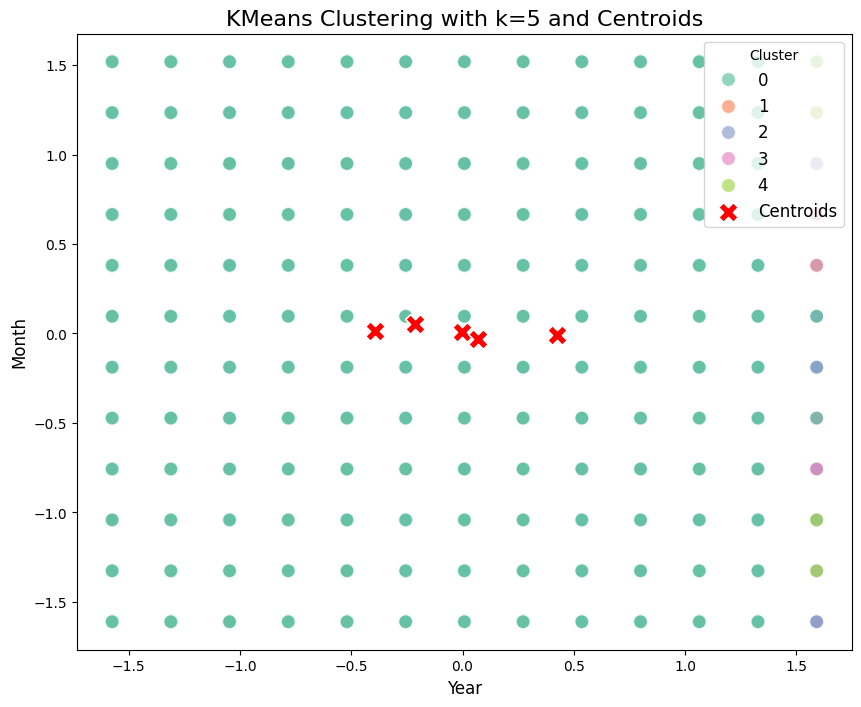

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'DejaVu Sans' 

# Load the dataset

data = pd.read_csv("Dataset/Processed_dataset.csv", encoding="windows-1252")


features = data.drop(columns=['Risk Level'])  

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Define the range of k values
k_values = [3, 4, 5]  

# Loop over each k and perform clustering, then visualize the results
for k in k_values:
    # Initialize and fit KMeans model for the current k
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Get the cluster centers
    centers = kmeans.cluster_centers_

    # Create a DataFrame to store the scaled data and cluster labels
    clustered_data = pd.DataFrame(scaled_data, columns=features.columns)
    clustered_data['Cluster'] = kmeans_labels

    # Plotting
    plt.figure(figsize=(10, 8))

    # Scatter plot of the data points, colored by cluster label
    sns.scatterplot(x=clustered_data[clustered_data.columns[0]], 
                    y=clustered_data[clustered_data.columns[1]], 
                    hue='Cluster', 
                    palette='Set2', 
                    data=clustered_data, 
                    s=100, 
                    alpha=0.7)

    # Plot the centroids on top of the scatter plot
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                    color='red', 
                    marker='X', 
                    s=200, 
                    label='Centroids')

   
    plt.title(f'KMeans Clustering with k={k} and Centroids', fontsize=16)
    plt.xlabel(clustered_data.columns[0], fontsize=12)
    plt.ylabel(clustered_data.columns[1], fontsize=12)

    
    plt.legend(title='Cluster', loc='upper right', fontsize=12)

    # Show the plot for the current k
    plt.show()




In [ ]:
%pip install Kneed

Elbow Method to determine optimal number of clusters 

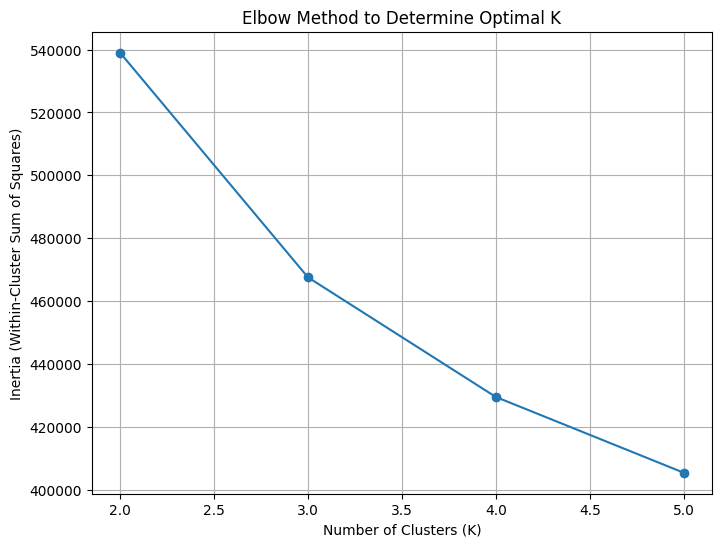

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of K values to test
k_values = range(2, 6)
inertia = []

# Compute K-Means clustering for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


Silhouette Scores for Different K Values

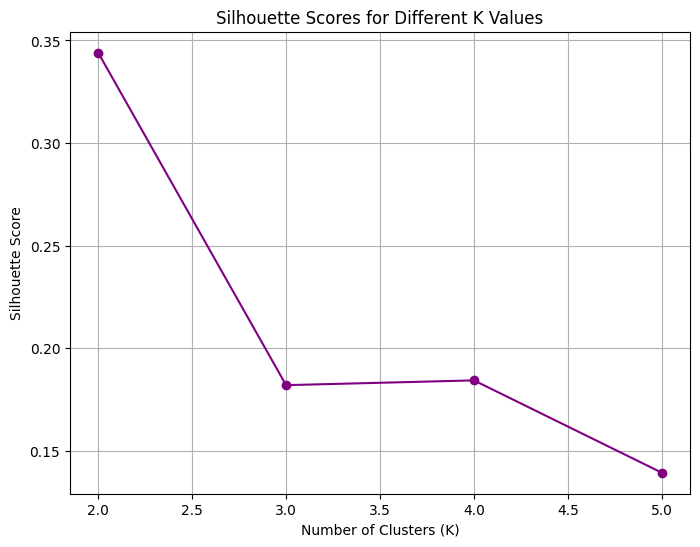

In [20]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Scores for K >= 2
silhouette_scores = []

for k in range(2, 6):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


After applying the elbow method and silhouette score we determine the best number of clustring is when the k=4 